<a href="https://colab.research.google.com/github/EsauHV/EmmanuelEsau2077359/blob/main/Proyecto_Final_Equipo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EQUIPO 2

Ana Maytte Fabian Guevara 1897145

Emmanuel Esaú Heraldez Valdez 2077359

Diego Adrián Rodríguez Ordaz 2032270

Ángel Gabriel Melchor Salinas 1974670

Jorge Zamora Villarreal 2077438

IMPORTAR BIBLIOTECAS

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Descargue y prepare el conjunto de datos

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

Verifica los datos

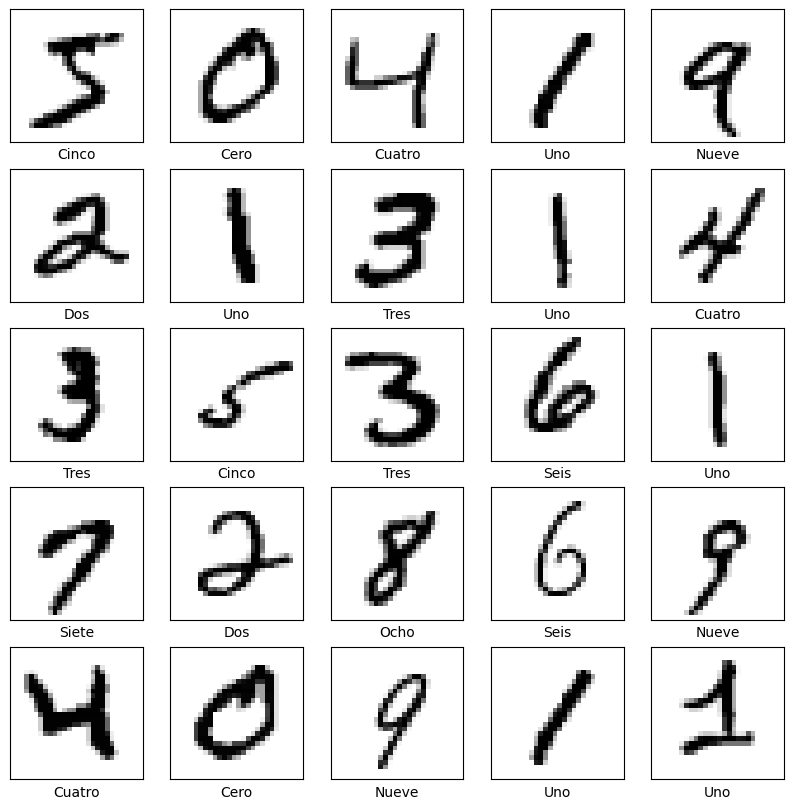

In [ ]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

Crear la base convolucional

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_11 (Dense)            (None, 64)               

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_11 (Dense)            (None, 64)               

Compilar y entrenar el modelo.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 73s 38ms/step - loss: 0.1845 - accuracy: 0.9414 - val_loss: 0.0609 - val_accuracy: 0.9801
Epoch 2/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0545 - accuracy: 0.9832 - val_loss: 0.0424 - val_accuracy: 0.9849
Epoch 3/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0367 - accuracy: 0.9884 - val_loss: 0.0425 - val_accuracy: 0.9861
Epoch 4/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0278 - accuracy: 0.9917 - val_loss: 0.0307 - val_accuracy: 0.9900
Epoch 5/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0215 - accuracy: 0.9934 - val_loss: 0.0336 - val_accuracy: 0.9888
Epoch 6/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0169 - accuracy: 0.9944 - val_loss: 0.0403 - val_accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0136 - accuracy: 0.9956 - val_loss: 0.0354 -

Evaluar el modelo

313/313 - 3s - loss: 0.0424 - accuracy: 0.9910 - 3s/epoch - 11ms/step


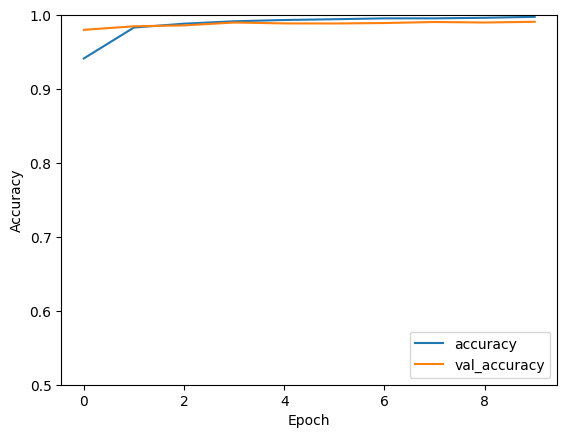

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.9909999966621399
